# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 4**_

## Import Statements

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [22]:
base_path = "../Images/{}"

## Util Functions

In [23]:
def read_image(path, cvtcolor="RGB", cvtfloat=False):
    if cvtcolor == "RGB":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB)
    elif cvtcolor == "GRAY":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

In [24]:
def get_normalized_CDF(image, bins=256):
    pixels = image.flatten()
    histogram = np.zeros(bins)
    for pixel in pixels:
        histogram[pixel] += 1
    cs=np.cumsum(histogram)
    cum_hist = (cs - cs.min()) * (255 - 0) / (cs.max() - cs.min())
    return histogram, cum_hist.astype('uint8')

In [25]:
def hist_equlization(image):
    _, cdf = get_normalized_CDF(image)

    # img_new = cdf[image.flatten()]
    flattened_im = image.flatten()
    new_values = np.interp(flattened_im, np.arange(256), cdf)

    img_new = np.reshape(new_values, image.shape)
    return img_new.astype(np.uint8)

In [26]:
def show_results(image, new_image):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs[0][0].imshow(image, cmap='gray')
    axs[0][0].set_title('Original Image')
    axs[0][0].axis('off')
    axs[1][0].imshow(new_image, cmap='gray')
    axs[1][0].set_title('New Image')
    axs[1][0].axis('off')

    hist_original, _ = get_normalized_CDF(image)
    hist_new, _ = get_normalized_CDF(new_image)

    axs[0][1].plot(hist_original)
    axs[0][1].set_title('Original Image Histogram')
    axs[0][1].set_xlabel('Pixel Intensity')
    axs[0][1].set_ylabel('Count')
    axs[0][1].set_xlim([0, 255])

    axs[1][1].plot(hist_new)
    axs[1][1].set_title('New Image Histogram')
    axs[1][1].set_xlabel('Pixel Intensity')
    axs[1][1].set_ylabel('Count')
    axs[1][1].set_xlim([0, 255])
    plt.show()

## Main Code

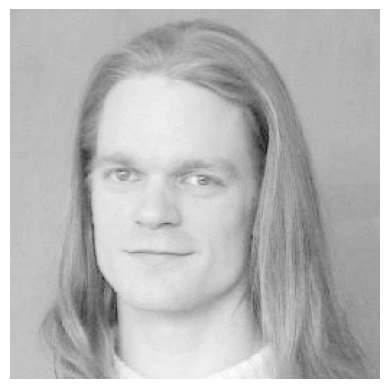

In [27]:
img = read_image('low.png', cvtcolor="GRAY")
show_image(img, cmap='gray')

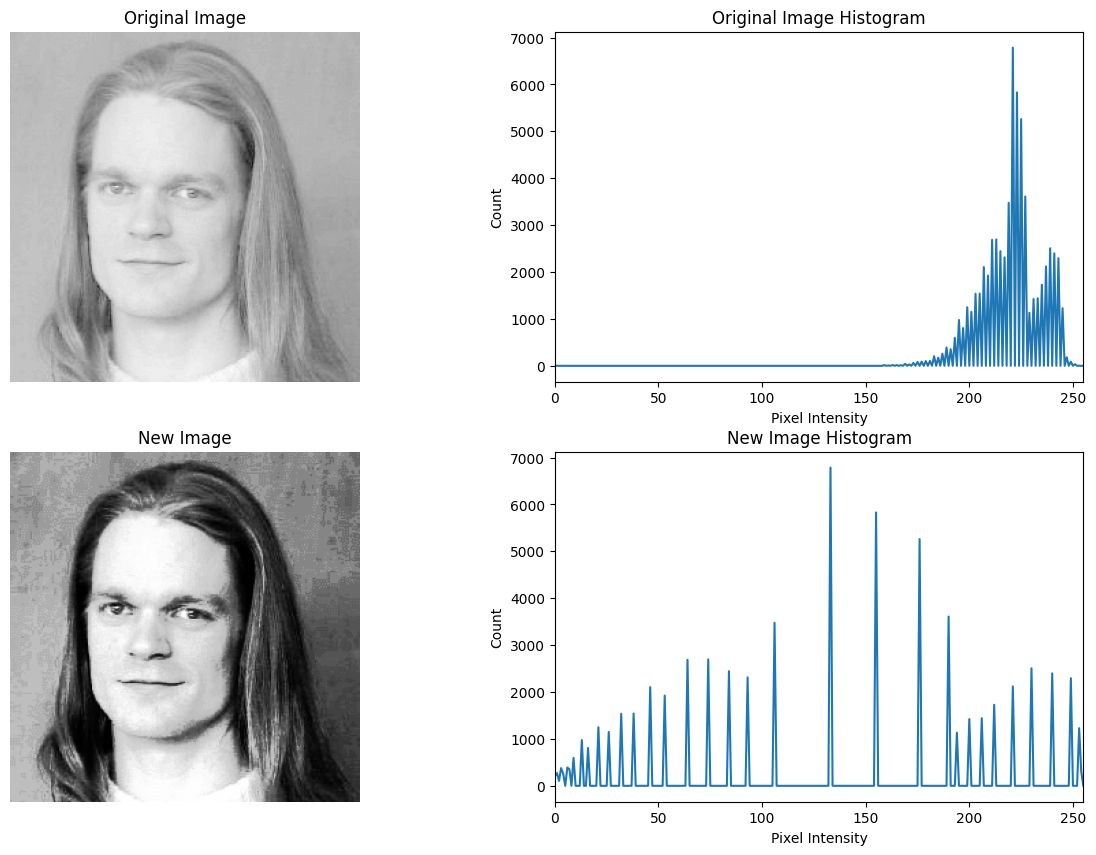

In [28]:
new_image = hist_equlization(img)
show_results(img, new_image)

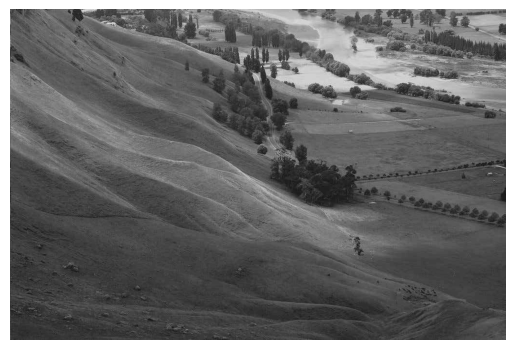

In [29]:
img = read_image('low.jpg', cvtcolor="GRAY")
show_image(img, cmap='gray')

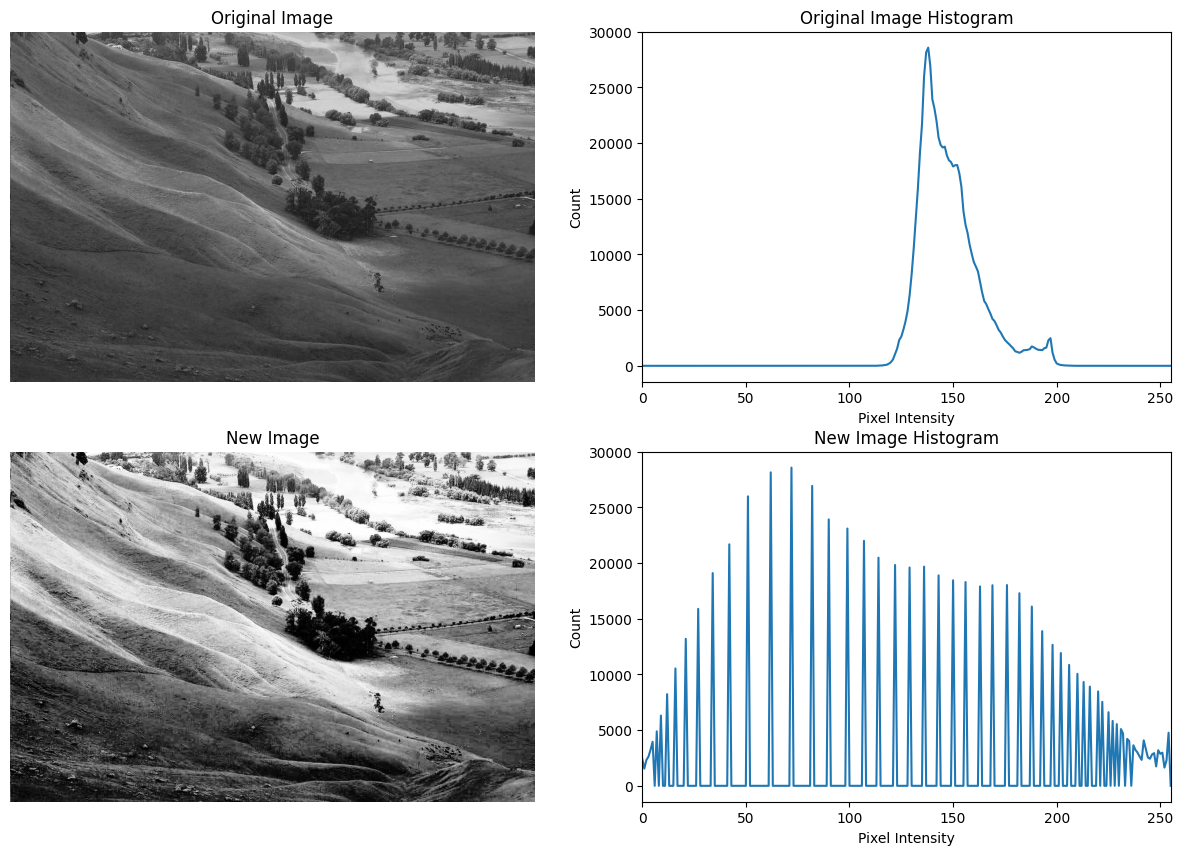

In [30]:
new_image = hist_equlization(img)
show_results(img, new_image)